# (A) Preprocessing

In [1]:
import networkx as nx
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from geopy import distance

In [2]:
airlines=pd.read_csv('C:/Users/STLEE/Data/Community Detection/data/airlines.csv',
                     index_col=False,header=None, 
                     names=['Airline_ID','Name','Alias','IATA','ICAO','Callsign','Country','Active'])
airports=pd.read_csv('C:/Users/STLEE/Data/Community Detection/data/airports.csv',index_col=False,header=None, 
                     names=['Airport_ID','Name','City','Country','IATA','ICAO','Latitude','Longitude','Altitude',
                            'Timezone','DST','Tz','Type','Source'])
routes=pd.read_csv('C:/Users/STLEE/Data/Community Detection/data/routes.csv',
                   index_col=False,header=None,names=['Airline','Airline_ID',
                                                      'Source_airport','Source_airport_ID','Destination_airport',
                                                      'Destination_airport_ID','Codeshare','Stops',
                                                      'Equipment'])
planes=pd.read_csv('C:/Users/STLEE/Data/Community Detection/data/planes.csv',
                   index_col=False,header=None,names=['Name','IATA code','ICAO code'])

In [3]:
airlines.head(5)

Airline_ID                                          Name Alias IATA ICAO  \
0          -1                                       Unknown    \N    -  NaN   
1           1                                Private flight    \N    -  NaN   
2           2                                   135 Airways    \N  NaN  GNL   
3           3                                 1Time Airline    \N   1T  RNX   
4           4  2 Sqn No 1 Elementary Flying Training School    \N  NaN  WYT   

  Callsign         Country Active  
0       \N              \N      Y  
1      NaN             NaN      Y  
2  GENERAL   United States      N  
3  NEXTIME    South Africa      Y  
4      NaN  United Kingdom      N

In [4]:
routes.head(5)

Airline Airline_ID Source_airport Source_airport_ID Destination_airport  \
0      2B        410            AER              2965                 KZN   
1      2B        410            ASF              2966                 KZN   
2      2B        410            ASF              2966                 MRV   
3      2B        410            CEK              2968                 KZN   
4      2B        410            CEK              2968                 OVB   

  Destination_airport_ID Codeshare  Stops Equipment  
0                   2990       NaN      0       CR2  
1                   2990       NaN      0       CR2  
2                   2962       NaN      0       CR2  
3                   2990       NaN      0       CR2  
4                   4078       NaN      0       CR2

In [5]:
planes.head(5)

Name IATA code ICAO code
0                       Aerospatiale (Nord) 262       ND2      N262
1  Aerospatiale (Sud Aviation) Se.210 Caravelle       CRV      S210
2                  Aerospatiale SN.601 Corvette       NDC      S601
3                Aerospatiale/Alenia ATR 42-300       AT4      AT43
4                Aerospatiale/Alenia ATR 42-500       AT5      AT45

In [6]:
airports.head(5)

Airport_ID                                         Name          City  \
0           1                               Goroka Airport        Goroka   
1           2                               Madang Airport        Madang   
2           3                 Mount Hagen Kagamuga Airport   Mount Hagen   
3           4                               Nadzab Airport        Nadzab   
4           5  Port Moresby Jacksons International Airport  Port Moresby   

            Country IATA  ICAO  Latitude   Longitude  Altitude Timezone DST  \
0  Papua New Guinea  GKA  AYGA -6.081690  145.391998      5282       10   U   
1  Papua New Guinea  MAG  AYMD -5.207080  145.789001        20       10   U   
2  Papua New Guinea  HGU  AYMH -5.826790  144.296005      5388       10   U   
3  Papua New Guinea  LAE  AYNZ -6.569803  146.725977       239       10   U   
4  Papua New Guinea  POM  AYPY -9.443380  147.220001       146       10   U   

                     Tz     Type       Source  
0  Pacific/Port_Moresby  airport  OurAirports  
1  Pacific/Port_Moresby  airport  OurAirports  
2  Pacific/Port_Moresby  airport  OurAirports  
3  Pacific/Port_Moresby  airport  OurAirports  
4  Pacific/Port_Moresby  airport  OurAirports

In [7]:
airports['Continent']=airports['Tz'].str.split('/').str[0]

In [8]:
airports.head(5)

Airport_ID                                         Name          City  \
0           1                               Goroka Airport        Goroka   
1           2                               Madang Airport        Madang   
2           3                 Mount Hagen Kagamuga Airport   Mount Hagen   
3           4                               Nadzab Airport        Nadzab   
4           5  Port Moresby Jacksons International Airport  Port Moresby   

            Country IATA  ICAO  Latitude   Longitude  Altitude Timezone DST  \
0  Papua New Guinea  GKA  AYGA -6.081690  145.391998      5282       10   U   
1  Papua New Guinea  MAG  AYMD -5.207080  145.789001        20       10   U   
2  Papua New Guinea  HGU  AYMH -5.826790  144.296005      5388       10   U   
3  Papua New Guinea  LAE  AYNZ -6.569803  146.725977       239       10   U   
4  Papua New Guinea  POM  AYPY -9.443380  147.220001       146       10   U   

                     Tz     Type       Source Continent  
0  Pacific/Port_Moresby  airport  OurAirports   Pacific  
1  Pacific/Port_Moresby  airport  OurAirports   Pacific  
2  Pacific/Port_Moresby  airport  OurAirports   Pacific  
3  Pacific/Port_Moresby  airport  OurAirports   Pacific  
4  Pacific/Port_Moresby  airport  OurAirports   Pacific

In [9]:
#Eliminate the '/N or NaN' and inactive airport routes from dataset
##Create a list(set of unique airport IDs)
airports_routes=[]
for i in list(set(routes['Source_airport_ID']) | set(routes['Destination_airport_ID'])):
    try:
        airports_routes.append(int(i))
    except:
        continue
        
airports_airports=list(airports['Airport_ID'])

airports_cleaned = list(set(airports_routes) & set(airports_airports))
airports_cleaned_str = [str(i) for i in airports_cleaned]

routes_cleaned = routes[routes['Source_airport_ID'].isin(airports_cleaned_str) & 
                        routes['Destination_airport_ID'].isin(airports_cleaned_str)]

airports_cleaned = airports[airports['Airport_ID'].isin(airports_cleaned_str)]

In [10]:
#Show the number of data changes
print(f'Initial number of routes is {len(routes)} and the cleansed number of routes is {len(routes_cleaned)}')
print(f'Initial number of airports is {len(airports)} and the cleansed number of airports is {len(airports_cleaned)}')

Initial number of routes is 67663 and the cleansed number of routes is 66771
Initial number of airports is 7698 and the cleansed number of airports is 3221


In [11]:
country_timezone_df=pd.read_csv('C:/Users/STLEE/Data/NTDS2019_Project-master/NTDS2019_Project-master/data/timezones.csv',
                                encoding='latin-1')

In [12]:
country_timezone_df.head(5)

Country Code    Country Name          Time Zone  GMT Offset
0           AF     Afghanistan         Asia/Kabul  UTC +04:30
1           AX   Aland Islands   Europe/Mariehamn  UTC +03:00
2           AL         Albania      Europe/Tirane  UTC +02:00
3           DZ         Algeria     Africa/Algiers  UTC +01:00
4           AS  American Samoa  Pacific/Pago_Pago  UTC -11:00

In [13]:
country_timezone_df["Continent"] = country_timezone_df["Time Zone"].str.split("/").str[0]

In [14]:
error_candidates = airports[airports.apply(lambda row: row["Tz"].split("/")[0] not in 
                                           country_timezone_df[country_timezone_df["Country Name"] == 
                                                               row["Country"]]["Continent"].unique().tolist(),axis = 1)]

In [15]:
error_candidates

Airport_ID                                    Name  \
250          253                      Port Bouet Airport   
251          254                          Bouaké Airport   
252          255                           Daloa Airport   
253          256                         Korhogo Airport   
254          257                             Man Airport   
255          258                       San Pedro Airport   
256          259                    Yamoussoukro Airport   
649          658              Svalbard Airport, Longyear   
863          883                       Maya-Maya Airport   
864          884                          Owando Airport   
865          885                          Ouesso Airport   
866          886                    Pointe Noire Airport   
997         1020            Ndjili International Airport   
998         1021                           Ndolo Airport   
999         1022                          Muanda Airport   
1000        1023                     Kitona Base Airport   
1001        1024                        Bandundu Airport   
1002        1025                          Kikwit Airport   
1003        1026                        Mbandaka Airport   
1004        1027                       Gbadolite Airport   
1005        1028                          Gemena Airport   
1006        1029                        Kotakoli Airport   
1007        1030                          Lisala Airport   
1008        1031           Bangoka International Airport   
1009        1032                          Matari Airport   
1010        1033                           Bunia Airport   
1011        1034                       Buta Zega Airport   
1012        1035                   Bukavu Kavumu Airport   
1013        1036              Goma International Airport   
1014        1037                           Kindu Airport   
...          ...                                     ...   
7668       13821                          Gitega Airport   
7669       13829  Región de Murcia International Airport   
7670       13830                Fazenda Kajussol Airport   
7671       13880                    Pelee Island Airport   
7672       13881                   Costa Marques Airport   
7673       13891                       Mangalore Airport   
7674       14086          San Isidro del General Airport   
7675       14087                          Zabrat Airport   
7676       14088                         Bezmer Air Base   
7677       14089                        Osovtsy Air Base   
7678       14090                        Yuanmou Air Base   
7679       14091            Changsha Datuopu Airport/AFB   
7680       14092                      Xingcheng Air Base   
7681       14093                       Lefkoniko Airport   
7682       14095                          Songwe Airport   
7683       14096                   Kalocsa/Foktő Airport   
7684       14097                  Bilogai-Sugapa Airport   
7685       14098                        Jakkur Aerodrome   
7686       14099                      Jalal-Abad Airport   
7687       14100                           Ramon Airport   
7688       14101                          Rustaq Airport   
7689       14102                    Laguindingan Airport   
7690       14103                     Kostomuksha Airport   
7691       14104                   Privolzhskiy Air Base   
7692       14105                        Kubinka Air Base   
7693       14106                     Rogachyovo Air Base   
7694       14107                   Ulan-Ude East Airport   
7695       14108                    Krechevitsy Air Base   
7696       14109             Desierto de Atacama Airport   
7697       14110                      Melitopol Air Base   

                       City              Country IATA  ICAO   Latitude  \
250                 Abidjan        Cote d'Ivoire  ABJ  DIAP   5.261390   
251                  Bouake        Cote d'Ivoire  BYK  DIBK   7.738800   
252                   Daloa        Cote d'Ivoire  DJO  DIDL   6

Checkpoint: Save cleaned data

In [17]:
# Save the cleaned data
routes_cleaned.to_csv('data/routes_cleaned.csv',index=False)
airports_cleaned.to_csv('data/airports_cleaned.csv',index=False)

In [18]:
airports

Airport_ID                                         Name  \
0              1                               Goroka Airport   
1              2                               Madang Airport   
2              3                 Mount Hagen Kagamuga Airport   
3              4                               Nadzab Airport   
4              5  Port Moresby Jacksons International Airport   
5              6                  Wewak International Airport   
6              7                           Narsarsuaq Airport   
7              8                      Godthaab / Nuuk Airport   
8              9                        Kangerlussuaq Airport   
9             10                               Thule Air Base   
10            11                             Akureyri Airport   
11            12                          Egilsstaðir Airport   
12            13                         Hornafjörður Airport   
13            14                              Húsavík Airport   
14            15                           Ísafjörður Airport   
15            16               Keflavik International Airport   
16            17                       Patreksfjörður Airport   
17            18                            Reykjavik Airport   
18            19                         Siglufjörður Airport   
19            20                       Vestmannaeyjar Airport   
20            21                      Sault Ste Marie Airport   
21            22               Winnipeg / St. Andrews Airport   
22            23            Halifax / CFB Shearwater Heliport   
23            24                          St. Anthony Airport   
24            25                  Tofino / Long Beach Airport   
25            26                             Kugaaruk Airport   
26            27                          Baie Comeau Airport   
27            28                               CFB Bagotville   
28            29                           Baker Lake Airport   
29            30                       Campbell River Airport   
...          ...                                          ...   
7668       13821                               Gitega Airport   
7669       13829       Región de Murcia International Airport   
7670       13830                     Fazenda Kajussol Airport   
7671       13880                         Pelee Island Airport   
7672       13881                        Costa Marques Airport   
7673       13891                            Mangalore Airport   
7674       14086               San Isidro del General Airport   
7675       14087                               Zabrat Airport   
7676       14088                              Bezmer Air Base   
7677       14089                             Osovtsy Air Base   
7678       14090                             Yuanmou Air Base   
7679       14091                 Changsha Datuopu Airport/AFB   
7680       14092                           Xingcheng Air Base   
7681       14093                            Lefkoniko Airport   
7682       14095                               Songwe Airport   
7683       14096                        Kalocsa/Foktő Airport   
7684       14097                       Bilogai-Sugapa Airport   
7685       14098                             Jakkur Aerodrome   
7686       14099                           Jalal-Abad Airport   
7687       14100                                Ramon Airport   
7688       14101                               Rustaq Airport   
7689       14102                         Laguindingan Airport   
7690       14103                          Kostomuksha Airport   
7691       14104                        Privolzhskiy Air Base   
7692       14105                             Kubinka Air Base   
7693       14106                          Rogachyovo Air Base   
7694       14107                        Ulan-Ude East Airport   
7695       14108                         Krechevitsy Air Base   
7696       14109                  Desierto de Atacama Airport   
7697       14110                         

## A.1. Create nodes

In [19]:
# Load packages for segment
import networkx as nx
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

Checkpoint: Load saved data

In [20]:
# Load previous saved data
routes = pd.read_csv("./data/routes_cleaned.csv")
airports = pd.read_csv("./data/airports_cleaned.csv")

In [21]:
# Get source and destination airports from routes
src_airports = routes[["Source_airport_ID", "Source_airport"]]
src_airports.columns = ["Airport_ID", "Airport"]
dst_airports = routes[["Destination_airport_ID", "Destination_airport"]]
dst_airports.columns = ["Airport_ID", "Airport"]

In [22]:
# Create nodes from airports
nodes = pd.concat([src_airports, dst_airports], axis = 0).drop_duplicates()
nodes.replace(to_replace = "\\N", value = np.NaN, inplace = True)
nodes.dropna(axis = 0, inplace = True)
nodes["Airport_ID"] = nodes["Airport_ID"].apply(int)

In [23]:
airports.columns

Index(['Airport_ID', 'Name', 'City', 'Country', 'IATA', 'ICAO', 'Latitude',
       'Longitude', 'Altitude', 'Timezone', 'DST', 'Tz', 'Type', 'Source',
       'Continent'],
      dtype='object')

In [24]:
# Add latitudes, longitudes and continents to nodes
nodes = nodes.merge(right = airports[["Airport_ID", "Latitude", "Longitude", "Tz"]],
                    left_on = "Airport_ID",
                    right_on = "Airport_ID")

nodes.set_index("Airport_ID", inplace = True)
nodes["Tz"] = nodes["Tz"].str.split('/').str[0]

In [25]:
nodes.columns=['Airport','Latitude','Longitude','Continent']
nodes.index.name='Airport_ID'

In [26]:
nodes.head(5)

Airport   Latitude  Longitude Continent
Airport_ID                                        
2965           AER  43.449902  39.956600    Europe
2966           ASF  46.283298  48.006302    Europe
2968           CEK  55.305801  61.503300      Asia
4029           DME  55.408798  37.906300    Europe
6156           EGO  50.643799  36.590099    Europe

In [27]:
nodes.shape

(3214, 4)

In [28]:
N_NODES = nodes.shape[0]

In [29]:
N_NODES

3214

## A.2. Create edges

In [30]:
# Create edges from routes between airports
edges = routes[["Source_airport_ID", "Destination_airport_ID"]]
edges = edges.replace(to_replace = "\\N", value = np.NaN)
edges.dropna(axis = 0, inplace = True)

# Convert edges id to int
edges["Source_airport_ID"] = edges["Source_airport_ID"].apply(int)
edges["Destination_airport_ID"] = edges["Destination_airport_ID"].apply(int)

In [31]:
edges.head()

Source_airport_ID  Destination_airport_ID
0               2965                    2990
1               2966                    2990
2               2966                    2962
3               2968                    2990
4               2968                    4078

In [32]:
# Create mapping from airport id to node id
airport_id2idx = pd.DataFrame(nodes.index.unique())

In [33]:
nodes.index.unique()

Int64Index([2965, 2966, 2968, 4029, 6156, 2922, 2952, 2990, 2948, 2962,
            ...
            1040, 2697, 1463, 7158, 7135, 8259, 7370, 6372, 4125, 7369],
           dtype='int64', name='Airport_ID', length=3214)

In [34]:
##reset_index() creates a new column (running digits-prior index) and a new index (running digits)
airport_id2idx = airport_id2idx.reset_index().set_index("Airport_ID")

In [35]:
airport_id2idx.columns = ["nodes_idx"]

In [36]:
airport_id2idx.head(5)

nodes_idx
Airport_ID           
2965                0
2966                1
2968                2
4029                3
6156                4

In [37]:
# Add node_ids to edges for adjacency matrix construction
## inner merge(join) on left edge table via 'Source_airport_ID' with right 'airport_id2idx' table via its index or"Airport_ID".
edges = edges.merge(right = airport_id2idx,
                   left_on = "Source_airport_ID",
                   right_index = True,
                   sort = False)

## Do the same for "Destination_airport_ID"
edges = edges.merge(right = airport_id2idx,
                   left_on = "Destination_airport_ID",
                   right_index = True,
                   sort = False,
                   suffixes = ["_src", "_dst"])

## Eliminate duplicate edges (just in case)
edges.drop_duplicates(inplace = True)

In [38]:
edges.head(5)

Source_airport_ID  Destination_airport_ID  nodes_idx_src  nodes_idx_dst
0               2965                    2990              0              7
1               2966                    2990              1              7
3               2968                    2990              2              7
5               4029                    2990              3              7
9               6156                    2990              4              7

## A.3. Create adjacency matrix

### A.3.1. Create non-weighted adjacency matrix

In [39]:
adjacency = np.zeros([N_NODES, N_NODES])
adjacency

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [40]:
## Convert dataframe to array (.values or .to_numpy()) and transpose (.T) the shape of the array
pairs = edges[["nodes_idx_src", "nodes_idx_dst"]].values.T

In [41]:
## Create tuple ([......],[......]) as coordinates for matrix
tuple(pairs.tolist())

([0,
  1,
  2,
  3,
  4,
  8,
  14,
  83,
  233,
  237,
  339,
  411,
  562,
  745,
  746,
  747,
  749,
  750,
  752,
  1697,
  1902,
  0,
  2,
  3,
  7,
  8,
  9,
  10,
  13,
  14,
  18,
  308,
  339,
  346,
  406,
  409,
  441,
  644,
  645,
  745,
  747,
  748,
  749,
  751,
  752,
  766,
  772,
  777,
  1723,
  2365,
  2492,
  2805,
  0,
  3,
  8,
  51,
  83,
  180,
  213,
  226,
  419,
  436,
  439,
  441,
  457,
  460,
  476,
  481,
  482,
  483,
  658,
  749,
  751,
  956,
  957,
  959,
  2146,
  0,
  3,
  5,
  6,
  8,
  14,
  50,
  51,
  57,
  121,
  126,
  211,
  329,
  427,
  429,
  439,
  441,
  442,
  444,
  460,
  461,
  466,
  482,
  484,
  562,
  635,
  636,
  645,
  656,
  658,
  748,
  749,
  766,
  957,
  969,
  1065,
  1066,
  1320,
  1449,
  1702,
  1703,
  0,
  2,
  3,
  5,
  6,
  7,
  8,
  9,
  13,
  14,
  18,
  155,
  162,
  169,
  232,
  233,
  234,
  235,
  236,
  237,
  269,
  294,
  308,
  329,
  334,
  337,
  339,
  340,
  346,
  406,
  429,
  439,
  441,
 

In [42]:
## example: arr2d[[2,4,6,6],[2,4,6,7]] = 1, assign 1 to each of the matrice coordinate.
adjacency[tuple(pairs.tolist())] = 1

In [43]:
## edges are undirected, hence we make both sides of the matrix symmetrical. Then, we make those with values into a Boolean.
adjacency = (adjacency + adjacency.T) > 0

In [44]:
#np.identity(N_NODES) creates an eye based on shape of N_NODES. 1-np.identity(N_NODES) result in a matrix of 1 less the eye.
#Reason: To remove all self-referencing nodes (e.g. 1001,1001)
#multiplying by adjacency result in only nodes with value 1 in the matrix. (rest is 0*...=0)
adjacency = adjacency * (1 - np.identity(N_NODES))

In [45]:
#np.savetxt("foo.csv", adjacency, delimiter=",")

In [46]:
adjacency

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

### A.3.1.1. Create largest connected unweighted component graph

In [96]:
# Create largest connected component graph
G = nx.from_numpy_matrix(adjacency)

largest_cc_unweighted = max(nx.connected_component_subgraphs(G), key = len)

### A.3.2. Create laplacian kernel weighted adjacency matrix

In [48]:
# Set sigma value 
sigma = 1200

In [49]:
# Calculate the distance between airports
dists = edges.merge(nodes[["Airport", "Latitude", "Longitude"]],
                   left_on = "Source_airport_ID",
                   right_index = True)

dists = dists.merge(nodes[["Airport", "Latitude", "Longitude"]],
                   left_on = "Destination_airport_ID",
                   right_index = True,
                   suffixes = ("_src", "_dst"))

dists["distance"] = dists.apply(lambda row: distance.geodesic(row[["Latitude_src", "Longitude_src"]].values,
                                                              row[["Latitude_dst", "Longitude_dst"]].values).km,axis = 1)

In [50]:
# Eliminate self ending edges' entries
# filter out false output from apply
dists = dists[dists.apply(lambda row: row["Source_airport_ID"] != row["Destination_airport_ID"],
                           axis = 1)]

In [51]:
# Obtain statistics of distance
dists[["distance"]].describe()

distance
count  36906.000000
mean    1760.875394
std     1946.088833
min        2.832833
25%      571.716646
50%     1156.245634
75%     2092.216138
max    16089.885579

In [52]:
# Save dists
dists.to_csv("./data/dists.csv", index = False)

In [53]:
# Create heat kernel adjacency matrix from distance
laplacian_kernel_adjacency = np.zeros((N_NODES, N_NODES))
pairs = dists[["nodes_idx_src", "nodes_idx_dst"]].values.T
laplacian_kernel_adjacency[tuple(pairs.tolist())] = np.exp(-dists["distance"] / sigma)
laplacian_kernel_adjacency 

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [54]:
# Make the matrix symmetric
unsym_coors = np.array(np.where(laplacian_kernel_adjacency != laplacian_kernel_adjacency.T))

unsym_src = tuple(np.concatenate([unsym_coors, unsym_coors[::-1]], axis = 1).tolist())
unsym_tgt = tuple(np.concatenate([unsym_coors[::-1], unsym_coors], axis = 1).tolist())

laplacian_kernel_adjacency[unsym_src] += laplacian_kernel_adjacency[unsym_tgt]

In [55]:
dists.head()

Source_airport_ID  Destination_airport_ID  nodes_idx_src  nodes_idx_dst  \
0               2965                    2990              0              7   
1               2966                    2990              1              7   
3               2968                    2990              2              7   
5               4029                    2990              3              7   
9               6156                    2990              4              7   

  Airport_src  Latitude_src  Longitude_src Airport_dst  Latitude_dst  \
0         AER     43.449902      39.956600         KZN     55.606201   
1         ASF     46.283298      48.006302         KZN     55.606201   
3         CEK     55.305801      61.503300         KZN     55.606201   
5         DME     55.408798      37.906300         KZN     55.606201   
9         EGO     50.643799      36.590099         KZN     55.606201   

   Longitude_dst     distance  
0      49.278702  1507.989680  
1      49.278702  1040.943207  
3      49.278702   773.126239  
5      49.278702   718.084202  
9      49.278702  1010.815885

In [56]:
nodes.head()

Airport   Latitude  Longitude Continent
Airport_ID                                        
2965           AER  43.449902  39.956600    Europe
2966           ASF  46.283298  48.006302    Europe
2968           CEK  55.305801  61.503300      Asia
4029           DME  55.408798  37.906300    Europe
6156           EGO  50.643799  36.590099    Europe

In [57]:
airports[airports["City"] == "Istanbul"]

Airport_ID                                 Name      City Country IATA  \
770         1701        Atatürk International Airport  Istanbul  Turkey  ISL   
2185        4317  Sabiha Gökçen International Airport  Istanbul  Turkey  SAW   

      ICAO   Latitude  Longitude  Altitude Timezone DST               Tz  \
770   LTBA  40.976898    28.8146       163        3   E  Europe/Istanbul   
2185  LTFJ  40.898602    29.3092       312        3   E  Europe/Istanbul   

         Type       Source Continent  
770   airport  OurAirports    Europe  
2185  airport  OurAirports    Europe

In [58]:
airports.head()

Airport_ID                                         Name          City  \
0           1                               Goroka Airport        Goroka   
1           2                               Madang Airport        Madang   
2           3                 Mount Hagen Kagamuga Airport   Mount Hagen   
3           4                               Nadzab Airport        Nadzab   
4           5  Port Moresby Jacksons International Airport  Port Moresby   

            Country IATA  ICAO  Latitude   Longitude  Altitude Timezone DST  \
0  Papua New Guinea  GKA  AYGA -6.081690  145.391998      5282       10   U   
1  Papua New Guinea  MAG  AYMD -5.207080  145.789001        20       10   U   
2  Papua New Guinea  HGU  AYMH -5.826790  144.296005      5388       10   U   
3  Papua New Guinea  LAE  AYNZ -6.569803  146.725977       239       10   U   
4  Papua New Guinea  POM  AYPY -9.443380  147.220001       146       10   U   

                     Tz     Type       Source Continent  
0  Pacific/Port_Moresby  airport  OurAirports   Pacific  
1  Pacific/Port_Moresby  airport  OurAirports   Pacific  
2  Pacific/Port_Moresby  airport  OurAirports   Pacific  
3  Pacific/Port_Moresby  airport  OurAirports   Pacific  
4  Pacific/Port_Moresby  airport  OurAirports   Pacific

### A.3.2.1 Create largest component matrix for heat kernel adjacency matrix

In [59]:
# Create largest connected component graph
G = nx.from_numpy_matrix(laplacian_kernel_adjacency)

largest_cc = max(nx.connected_component_subgraphs(G), key = len)

In [60]:
# Get matrix indices of largest connected component graph
indices = list(largest_cc.nodes)

In [61]:
# Create largest connected component matrix
largest_cc_matrix = laplacian_kernel_adjacency[indices]
largest_cc_matrix = largest_cc_matrix[:, indices]

In [62]:
# Create back-up copy of largest_cc_matrix
np.save("data/largest_cc_matrix.npy", largest_cc_matrix,allow_pickle=True)
##test2 = np.load('data/largest_cc_matrix.npy')
##np.savetxt("foo2.csv", test3, delimiter=",") ##saving matrices in text

In [63]:
# Create mapping from idx to airport id
idx2airport_id = airport_id2idx.reset_index().set_index("nodes_idx")

In [64]:
mapping = dict(zip(range(len(indices)), indices))

In [65]:
# Create mapping from largest connected component idx to airport id
new_mapping = dict()

for key in mapping.keys():
    new_mapping[key] = idx2airport_id.loc[mapping[key]].values[0]

In [66]:
np.save("data/mapping.npy", new_mapping,allow_pickle=True)
#heat_kernel_adjacency = np.load('data/mapping.npy',allow_pickle=True)

In [86]:
mapping_index_airport = new_mapping

In [87]:
airports_key_id = airports.set_index('Airport_ID')

# (B) Clustering for Communities

This method is referenced from https://github.com/lchenbb/NTDS2019_Project

In [67]:
# Load packages for segment
# Import clustering and visualisation packages
import networkx as nx
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from geopy import distance
import pickle
import scipy
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import sparse
from sklearn.cluster import SpectralClustering
import folium
from sklearn.cluster import KMeans

### B.1.1. Embedding of non-weighted adjacency matrix

In [97]:
# Generate the laplacian matrix for the largest connected component
laplacian_nonweighted = nx.laplacian_matrix(largest_cc_unweighted).asfptype()

In [69]:
def spectral_decomposition_nonweighted(laplacian, dim):
    k_eigenvalues, k_eigenvectors = scipy.sparse.linalg.eigsh(laplacian, which='SA')
    eigenmap = k_eigenvectors[:,1:dim+1]
    
    return eigenmap

In [70]:
# Create non-weighted eigenmap embeddings
eigenmap_nonweighted = spectral_decomposition_nonweighted(laplacian_nonweighted, 2)

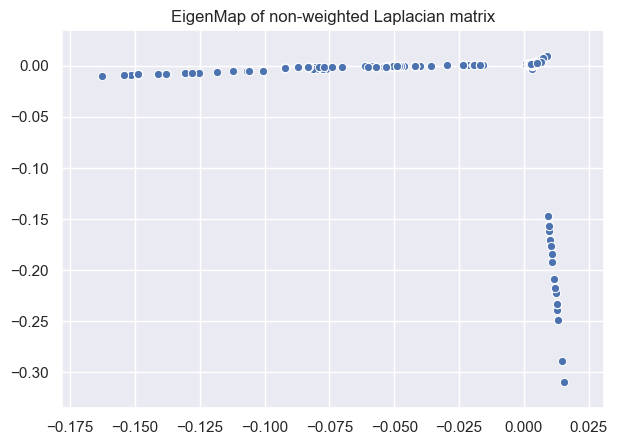

In [71]:
sns.set()
plt.figure(figsize=(7,5), dpi=100)
ax = sns.scatterplot(eigenmap_nonweighted[:,0], eigenmap_nonweighted[:,1])
ax.set_title('EigenMap of non-weighted Laplacian matrix');

### B.1.1. Embedding of weighted (Geosic Distance) adjacency matrix

In [72]:
#laplacian_kernel_adjacency = np.load('data/largest_cc_matrix.pkl.npy')
laplacian_kernel_adjacency = largest_cc_matrix

In [73]:
# Create largest connected component graph
G = nx.from_numpy_matrix(laplacian_kernel_adjacency)

largest_cc = max(nx.connected_component_subgraphs(G), key = len)

In [74]:
def spectral_decomposition_weighted(laplacian, degree_matrix, dim):
    k_eigenvalues, k_eigenvectors = scipy.linalg.eigh(laplacian)
    eigenvector_matrix = np.matmul(np.linalg.inv(degree_matrix), k_eigenvectors)
    eigenmap = eigenvector_matrix[:,1:dim+1]
    
    return eigenmap

In [75]:
# Create weighted eigenmap embeddings
laplacian_weighted, degree = sparse.csgraph.laplacian(laplacian_kernel_adjacency, normed=True, return_diag=True)
degree_matrix = np.diag(degree)
eigenmap_weighted = spectral_decomposition_weighted(laplacian_weighted, degree_matrix, 2)

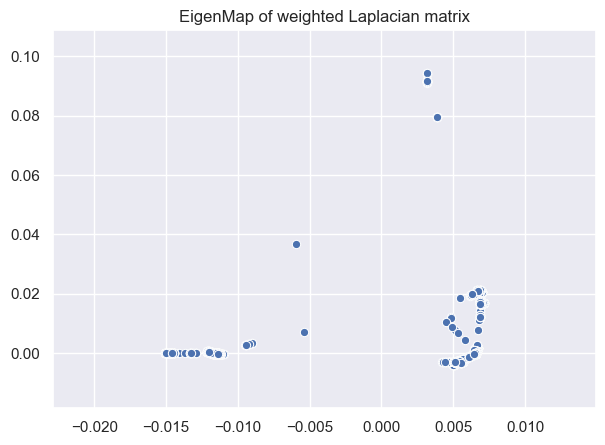

In [76]:
plt.figure(figsize=(7, 5),dpi=100)
ax = sns.scatterplot(eigenmap_weighted[:,0], eigenmap_weighted[:,1])
ax.set_title('EigenMap of weighted Laplacian matrix');

## B.2. Clustering by Spectral

In [80]:
colorMap = {
    0: 'darkgreen',
    1: 'yellow',
    2: 'purple',
    3: 'lightgreen',
    4: 'orange',
    5: 'grey',
    6: 'black',
    7: 'darkblue',
    8: 'darkred',
    9: 'white'
}

### B.2.1. Non-weighted Spectral Clustering

In [98]:
clustering_nonweighted = SpectralClustering(n_clusters = 9, random_state=0, affinity='nearest_neighbors')
clustering_nonweighted.fit_predict(laplacian_nonweighted);

D:\Anaconda3\lib\site-packages\sklearn\cluster\_spectral.py:482: UserWarning: The spectral clustering API has changed. ``fit``now constructs an affinity matrix from data. To use a custom affinity matrix, set ``affinity=precomputed``.
  warnings.warn("The spectral clustering API has changed. ``fit``"


In [78]:
predict_spectral_nonweighted=clustering_nonweighted.fit_predict(laplacian_nonweighted);

D:\Anaconda3\lib\site-packages\sklearn\cluster\_spectral.py:482: UserWarning: The spectral clustering API has changed. ``fit``now constructs an affinity matrix from data. To use a custom affinity matrix, set ``affinity=precomputed``.
  warnings.warn("The spectral clustering API has changed. ``fit``"


In [99]:
# Get the cluster label for each point
color_map_sc_nonweighted = []
for i in clustering_nonweighted.labels_:
    color_map_sc_nonweighted.append(colorMap[i])

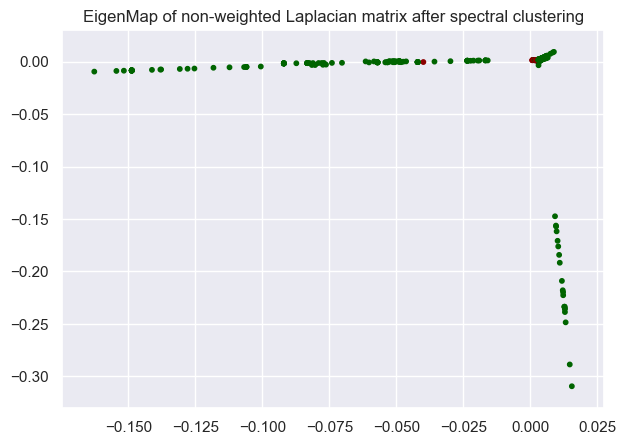

In [100]:
plt.figure(figsize=(7,5), dpi=100)
plt.scatter(eigenmap_nonweighted[:,0], eigenmap_nonweighted[:,1], s=10, c=color_map_sc_nonweighted)
plt.title('EigenMap of non-weighted Laplacian matrix after spectral clustering');

In [88]:
map_sc = folium.Map(tiles="openstreetmap")

for k, v in mapping_index_airport.items():
    airport = airports_key_id.loc[v]
    airport = airports_key_id.loc[v]
    coord = [airport['Latitude'], airport['Longitude']]
    folium.CircleMarker(location=coord,
                        radius=2,
                        fill=True,
                        opacity=0.0,
                        fill_color=color_map_sc_nonweighted[k],
                        fill_opacity=0.7
                       ).add_to(map_sc)

In [89]:
map_sc.save('data/spectral_non_weighted.html')

In [90]:
map_sc

In [290]:
couple = list(zip(largest_cc_unweighted.nodes, predict_spectral_nonweighted))
_dict = {}
for key, value in couple:
    if value not in _dict:
        _dict[value] = []
    _dict[value].append(key)
partition = []
for index in _dict.keys():
    partition.append(_dict[index])

In [291]:
nx.algorithms.community.coverage(largest_cc_unweighted, partition)

0.7921202145170712

In [292]:
nx.algorithms.community.modularity(largest_cc_unweighted, partition)

0.2298666637028088

In [293]:
nx.algorithms.community.performance(largest_cc_unweighted, partition)

0.3630658820592912

### B.2.2. Weighted Spectral Clustering

In [235]:
clustering_weighted = SpectralClustering(n_clusters=9, random_state=0, affinity='nearest_neighbors')
clustering_weighted.fit(laplacian_weighted);

D:\Anaconda3\lib\site-packages\sklearn\cluster\_spectral.py:482: UserWarning: The spectral clustering API has changed. ``fit``now constructs an affinity matrix from data. To use a custom affinity matrix, set ``affinity=precomputed``.
  warnings.warn("The spectral clustering API has changed. ``fit``"


In [249]:
predict_spectral_weighted = clustering_weighted.fit_predict(laplacian_weighted)

D:\Anaconda3\lib\site-packages\sklearn\cluster\_spectral.py:482: UserWarning: The spectral clustering API has changed. ``fit``now constructs an affinity matrix from data. To use a custom affinity matrix, set ``affinity=precomputed``.
  warnings.warn("The spectral clustering API has changed. ``fit``"


In [236]:
# Get the cluster label for each point
color_map_sc_weighted = []
for i in clustering_weighted.labels_:
    color_map_sc_weighted.append(colorMap[i])

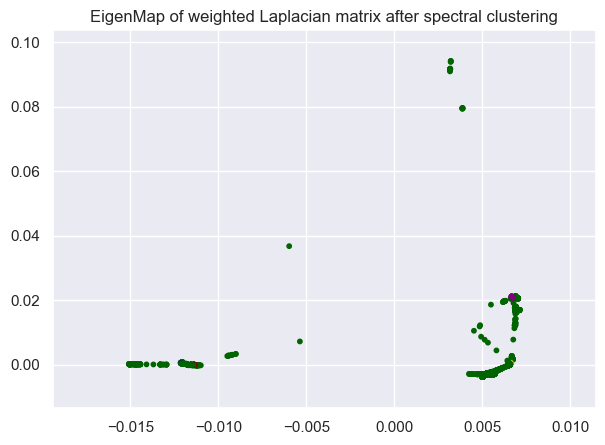

In [237]:
plt.figure(figsize=(7,5),dpi=100)
plt.scatter(eigenmap_weighted[:,0], eigenmap_weighted[:,1], s=10, c=color_map_sc_weighted)
plt.title('EigenMap of weighted Laplacian matrix after spectral clustering');

In [238]:
map_sc_weighted = folium.Map(tiles="openstreetmap")

for k, v in mapping_index_airport.items():
    airport = airports_key_id.loc[v]
    airport = airports_key_id.loc[v]
    coord = [airport['Latitude'], airport['Longitude']]
    folium.CircleMarker(location=coord,
                        radius=2,
                        fill=True,
                        opacity=0.0,
                        fill_color=color_map_sc_weighted[k],
                        fill_opacity=0.7
                       ).add_to(map_sc_weighted)

In [240]:
map_sc_weighted.save('data/spectral_weighted.html')

In [241]:
map_sc_weighted

In [294]:
couple = list(zip(largest_cc.nodes, predict_spectral_weighted))
_dict = {}
for key, value in couple:
    if value not in _dict:
        _dict[value] = []
    _dict[value].append(key)
partition = []
for index in _dict.keys():
    partition.append(_dict[index])

In [295]:
nx.algorithms.community.coverage(largest_cc, partition)

0.9115913555992141

In [296]:
nx.algorithms.community.modularity(largest_cc, partition)

0.007744211205579073

In [297]:
nx.algorithms.community.performance(largest_cc, partition)

0.2245032458163044

## B.3. Semi-Supervised Spectral Clustering: Modified K-Means Step

This method is referenced from https://github.com/lchenbb/NTDS2019_Project

### B.3.1. Load Ground Truth and Visualization

In [78]:
# Create graph from distances dataframe
G = nx.from_pandas_edgelist(dists, 
                            "Source_airport_ID",
                           "Destination_airport_ID",
                           ["distance"])

In [159]:
# Get the largest connected components
largest_cc = max(nx.connected_component_subgraphs(G), key = len)

### B.3.1.1. Determine continental hubs

In [81]:
# Get the betweeness centrality
betweenness = nx.betweenness_centrality(largest_cc)

In [82]:
# Get the eigen vector centrality
eigenvector_centrality = nx.eigenvector_centrality(largest_cc)

In [83]:
# Get the pagerank centrality
pagerank = nx.pagerank(largest_cc)

In [84]:
# Get order of each centrality measure
betweenness_ordered = dict(zip([k for k, _ in sorted(betweenness.items(),
                                                     key = lambda item: item[1],
                                                     reverse = True)],
                               range(1, len(betweenness) + 1)))

eigenvector_ordered = dict(zip([k for k, _ in sorted(eigenvector_centrality.items(),
                                                     key = lambda item: item[1],
                                                     reverse = True)],
                               range(1, len(eigenvector_centrality) + 1)))

pagerank_ordered = dict(zip([k for k, _ in sorted(pagerank.items(),
                                                  key = lambda item: item[1],
                                                  reverse = True)],
                            range(1, len(pagerank) + 1)))

In [85]:
# Create centrality summary with each centrality measure
centrality_summary = pd.DataFrame.from_dict([betweenness_ordered,
                                             eigenvector_ordered,
                                            pagerank_ordered])\
                                    .transpose()

centrality_summary.columns = ["Betwenness", "EigenVector", "PageRank"]

# Compute mean of all measures
centrality_summary["Mean_rank"] = centrality_summary.mean(axis = 1)

# Add Airport information to summary
centrality_summary = centrality_summary.merge(airports[["Airport_ID", "Name",
                                                        "City", "Country", "Tz"]],
                                             left_index = True,
                                             right_on = "Airport_ID")
centrality_summary["Continent"] = centrality_summary["Tz"].str.split("/").str[0]
centrality_summary.drop("Tz", axis = 1, inplace = True)

In [87]:
# Define number of airports to display in results
K = 10

In [88]:
# Get top K airports with respect to mean rank
displayed_summary = centrality_summary.sort_values(by = "Mean_rank", ascending = True, axis = 0).head(10)
displayed_summary.index = range(1, K + 1)
displayed_summary.index.name = "Overall rank"
print(f"The top {K} busiest airports")
displayed_summary

The top 10 busiest airports


Betwenness  EigenVector  PageRank  Mean_rank  Airport_ID  \
Overall rank                                                             
1                      1            3         6   3.333333        1382   
2                      6            1         8   5.000000         580   
3                      5            2         9   5.333333         340   
4                     10            7         3   6.666667        1701   
5                      4           20        11  11.666667        2188   
6                      8           28         2  12.666667        3830   
7                     12            6        21  13.000000         507   
8                      7           35        10  17.333333        3364   
9                      9           29        15  17.666667         193   
10                    19           37         1  19.000000        3682   

                                                          Name       City  \
Overall rank                                                                
1                      Charles de Gaulle International Airport      Paris   
2                                   Amsterdam Airport Schiphol  Amsterdam   
3                                    Frankfurt am Main Airport  Frankfurt   
4                                Atatürk International Airport   Istanbul   
5                                  Dubai International Airport      Dubai   
6                         Chicago O'Hare International Airport    Chicago   
7                                      London Heathrow Airport     London   
8                        Beijing Capital International Airport    Beijing   
9                      Lester B. Pearson International Airport    Toronto   
10            Hartsfield Jackson Atlanta International Airport    Atlanta   

                           Country Continent  
Overall rank                                  
1                           France    Europe  
2                      Netherlands    Europe  
3                          Germany    Europe  
4                           Turkey    Europe  
5             United Arab Emirates      Asia  
6                    United States   America  
7                   United Kingdom    Europe  
8                            China      Asia  
9                           Canada   America  
10                   United States   America

In [89]:
# Get hub of each continent
continent_hub_indices = centrality_summary.groupby("Continent", axis = 0)["Mean_rank"].idxmin()
continent_hubs = centrality_summary.loc[continent_hub_indices]

In [90]:
print("The hubs of each continent are:")
continent_hubs

The hubs of each continent are:


Betwenness  EigenVector  PageRank    Mean_rank  Airport_ID  \
381           29          170        38    79.000000         813   
1887           8           28         2    12.666667        3830   
326         1924         1384      2491  1933.000000         658   
1017           4           20        11    11.666667        2188   
479          260           54       149   154.333333        1054   
1641          14          298        14   108.666667        3361   
628            1            3         6     3.333333        1382   
1527         201          277       330   269.333333        3156   
1840          54          251       121   142.000000        3728   
3211          41           38        57    45.333333       11051   

                                              Name          City  \
381                 OR Tambo International Airport  Johannesburg   
1887          Chicago O'Hare International Airport       Chicago   
326                     Svalbard Airport, Longyear      Svalbard   
1017                   Dubai International Airport         Dubai   
479                           Gran Canaria Airport  Gran Canaria   
1641  Sydney Kingsford Smith International Airport        Sydney   
628        Charles de Gaulle International Airport         Paris   
1527                    Malé International Airport          Male   
1840         Daniel K Inouye International Airport      Honolulu   
3211                   Hamad International Airport          Doha   

                   Country  Continent  
381           South Africa     Africa  
1887         United States    America  
326                 Norway     Arctic  
1017  United Arab Emirates       Asia  
479                  Spain   Atlantic  
1641             Australia  Australia  
628                 France     Europe  
1527              Maldives     Indian  
1840         United States    Pacific  
3211                 Qatar         \N

In [91]:
def find_idx_from_airport_id(airport_ids, airport_id2idx):
    """
    Find matrix idx corresponding to airport ids
    @param airport_ids (list): list of airport ids to be converted
    @param airport_id2idx (dict): mapping from airport id to matrix idx
    @return airport_id2idx (dict): mapping from airport id to matrix idx of hub
    """
    
    airport_id2matrix_idx = {k: airport_id2idx[k] for k in airport_ids}
    
    return airport_id2matrix_idx

In [92]:
# Find hub indices in heat kernel largest component matrix from airport ids
heatker_idx2airport_id = new_mapping

heatker_airport_id2idx = {v: k for k, v in heatker_idx2airport_id.items()}

continent_hub_matrix_idx_mixed = find_idx_from_airport_id(continent_hubs["Airport_ID"].values,
                                                            heatker_airport_id2idx)

In [99]:
np.save("data/continent_hubs.npy", continent_hub_matrix_idx_mixed)

In [96]:
continent_hub_matrix_idx_mixed

{813: 603,
 3830: 117,
 658: 2005,
 2188: 346,
 1054: 52,
 3361: 300,
 1382: 429,
 3156: 1537,
 3728: 1157,
 11051: 979}

### B.3.1.2. Load Ground Truth

In [94]:
colorMap = {
    0: 'darkgreen',
    1: 'yellow',
    2: 'purple',
    3: 'lightgreen',
    4: 'orange',
    5: 'grey',
    6: 'black',
    7: 'darkblue',
    8: 'darkred',
    9: 'white'
}

In [95]:
airports = pd.read_csv('data/airports_cleaned.csv')
routes = pd.read_csv('data/routes_cleaned.csv')

airports_key_id = airports.set_index('Airport_ID')

mapping_index_airport = new_mapping

In [109]:
hub_dict = np.load('data/continent_hubs.npy', allow_pickle=True)
hub_dict = hub_dict[()]
hub_dict

{813: 603,
 3830: 117,
 658: 2005,
 2188: 346,
 1054: 52,
 3361: 300,
 1382: 429,
 3156: 1537,
 3728: 1157,
 11051: 979}

In [110]:
hub_city_index = {}
for k, v in hub_dict.items():
    city_name = airports_key_id.loc[k].City
    continent = airports_key_id.loc[k]['Tz']
    if '/' in continent:
        continent = continent.split('/')[0]
    else:
        continue
    hub_city_index[city_name] = (v, continent)

In [111]:
hub_city_index

{'Johannesburg': (603, 'Africa'),
 'Chicago': (117, 'America'),
 'Svalbard': (2005, 'Arctic'),
 'Dubai': (346, 'Asia'),
 'Gran Canaria': (52, 'Atlantic'),
 'Sydney': (300, 'Australia'),
 'Paris': (429, 'Europe'),
 'Male': (1537, 'Indian'),
 'Honolulu': (1157, 'Pacific')}

In [112]:
hub_list = [v[0] for k, v in hub_city_index.items()]

In [113]:
continent_list = []
for k, v in hub_city_index.items():
    continent_list.append(v[1])

In [114]:
continent_color_mapping = {}
for i in range(len(continent_list)):
    continent_color_mapping[continent_list[i]] = colorMap[i]

In [115]:
map_global_point_line = folium.Map(tiles="openstreetmap")

for k, v in mapping_index_airport.items():
    airport = airports_key_id.loc[v]
    airport = airports_key_id.loc[v]
    coord = [airport['Latitude'], airport['Longitude']]
    airport_con = airport['Tz']
    if '/' not in airport_con:
        continue
    airport_con = airport_con.split('/')[0]
    
    folium.CircleMarker(location=coord,
                        radius=2,
                        fill=True,
                        opacity=0.0,
                        fill_color=continent_color_mapping[airport_con],
                        fill_opacity=0.7
                       ).add_to(map_global_point_line)

for index, route in routes.iterrows():    
    src_info = airports_key_id.loc[int(route['Source_airport_ID'])]
    des_info = airports_key_id.loc[int(route['Destination_airport_ID'])]
    
    points = [[src_info['Latitude'], src_info['Longitude']], [des_info['Latitude'], des_info['Longitude']]]
    folium.PolyLine(points, color="grey", weight=0.1, opacity=0.1).add_to(map_global_point_line)

In [120]:
map_global_point_line.save('data/map_global_point_line.html')

In [121]:
map_global_point_cover = folium.Map(tiles="openstreetmap")

folium.GeoJson(
    'data/continent.json',
     style_function=lambda feature: {
        'fillColor': feature['color'],
        'color' : feature['color'],
        'weight' : 1,
        'fillOpacity' : 0.5,
    },
    name='geojson'
).add_to(map_global_point_cover)

folium.GeoJson(
    'data/oceania_borders.json',
     style_function=lambda feature: {
        'fillColor': 'green',
        'color' : 'green',
        'weight' : 1,
        'fillOpacity' : 0.5,
    },
    name='geojson'
).add_to(map_global_point_cover)

for k, v in mapping_index_airport.items():
    airport = airports_key_id.loc[v]
    airport = airports_key_id.loc[v]
    coord = [airport['Latitude'], airport['Longitude']]
    airport_con = airport['Tz']
    if '/' not in airport_con:
        continue
    airport_con = airport_con.split('/')[0]
    
    folium.CircleMarker(location=coord,
                        radius=2,
                        fill=True,
                        opacity=0.0,
                        fill_color=continent_color_mapping[airport_con],
                        fill_opacity=0.7
                       ).add_to(map_global_point_cover)


In [123]:
map_global_point_cover.save('data/map_global_point_cover.html')

### B.3.2.1. Non-weighted Modified Spectral Clustering: Ground-Truth K-Means

In [272]:
non_weighted_eigenvector_2 = eigenmap_nonweighted[:, 1:3]
kmeans_non_weighted = KMeans(n_clusters=9, init=non_weighted_eigenvector_2[hub_list, :]) 
kmeans_non_weighted.fit(non_weighted_eigenvector_2);

D:\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: Explicit initial center position passed: performing only one init in k-means instead of n_init=10
  This is separate from the ipykernel package so we can avoid doing imports until


In [273]:
predict_kmeans_non_weighted = kmeans_non_weighted.predict(non_weighted_eigenvector_2)

In [274]:
# Get the cluster label for each point
color_map_kmeans_non_weighted = []

for con in predict_kmeans_non_weighted:
    color_map_kmeans_non_weighted.append(colorMap[con])

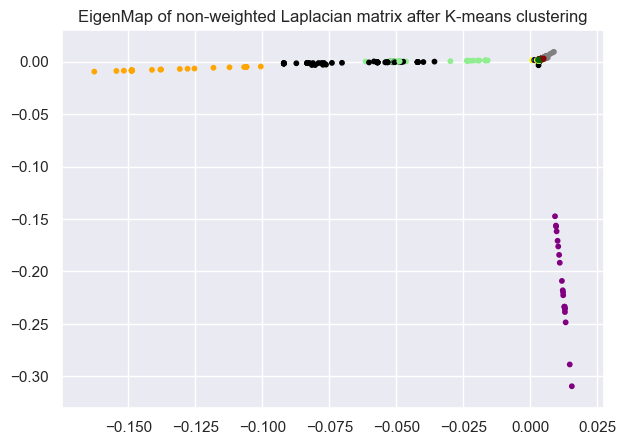

In [275]:
plt.figure(figsize=(7,5),dpi=100)
plt.scatter(eigenmap_nonweighted[:,0], eigenmap_nonweighted[:,1], s=10, c=color_map_kmeans_non_weighted)
plt.title('EigenMap of non-weighted Laplacian matrix after K-means clustering');

In [276]:
map_kmeans_non_weighted = folium.Map(tiles="openstreetmap")

for k, v in mapping_index_airport.items():
    airport = airports_key_id.loc[v]
    airport = airports_key_id.loc[v]
    coord = [airport['Latitude'], airport['Longitude']]
    folium.CircleMarker(location=coord,
                        radius=2,
                        fill=True,
                        opacity=0.0,
                        fill_color=color_map_kmeans_non_weighted[k],
                        fill_opacity=0.7
                       ).add_to(map_kmeans_non_weighted)

map_kmeans_non_weighted.save('data/map_kmeans_non_weighted.html')

In [277]:
map_kmeans_non_weighted

In [298]:
couple = list(zip(largest_cc_unweighted.nodes, predict_kmeans_non_weighted))
_dict = {}
for key, value in couple:
    if value not in _dict:
        _dict[value] = []
    _dict[value].append(key)
partition = []
for index in _dict.keys():
    partition.append(_dict[index])

In [299]:
nx.algorithms.community.coverage(largest_cc_unweighted, partition)

0.7667392343227314

In [300]:
nx.algorithms.community.modularity(largest_cc_unweighted, partition)

0.49542026658180466

In [301]:
nx.algorithms.community.performance(largest_cc_unweighted, partition)

0.8065200967386721

### B.3.2.2. Weighted Modified Spectral Clustering: Ground-Truth K-Means

In [215]:
weighted_eigenvector_2 = eigenmap_weighted[:,1:3]
kmeans_weighted = KMeans(n_clusters=9, init=weighted_eigenvector_2[hub_list, :]) 
kmeans_weighted.fit(weighted_eigenvector_2);

D:\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: Explicit initial center position passed: performing only one init in k-means instead of n_init=10
  This is separate from the ipykernel package so we can avoid doing imports until


In [216]:
predict_kmeans_weighted = kmeans_weighted.predict(weighted_eigenvector_2)

In [217]:
# Get the cluster label for each point
color_map_kmeans_weighted = []

for con in predict_kmeans_weighted:
    color_map_kmeans_weighted.append(colorMap[con])

Text(0.5, 1.0, 'EigenMap of weighted Laplacian matrix after K-means clustering')

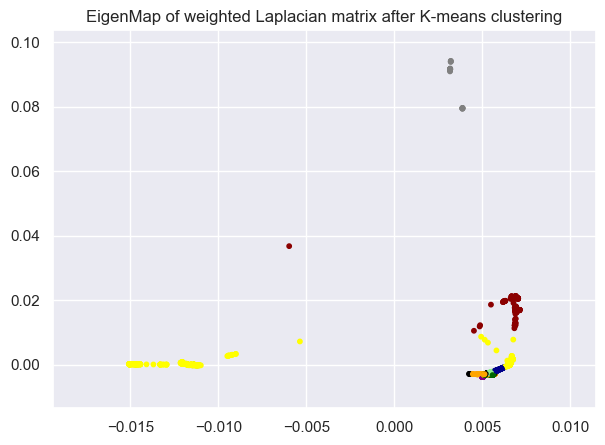

In [218]:
plt.figure(figsize=(7,5), dpi=100)
plt.scatter(eigenmap_weighted[:,0], eigenmap_weighted[:,1], s=10, c=color_map_kmeans_weighted)
plt.title('EigenMap of weighted Laplacian matrix after K-means clustering')

In [219]:
map_kmeans_weighted = folium.Map(tiles="openstreetmap")

for k, v in mapping_index_airport.items():
    airport = airports_key_id.loc[v]
    airport = airports_key_id.loc[v]
    coord = [airport['Latitude'], airport['Longitude']]
    folium.CircleMarker(location=coord,
                        radius=2,
                        fill=True,
                        opacity=0.0,
                        fill_color=color_map_kmeans_weighted[k],
                        fill_opacity=0.7
                       ).add_to(map_kmeans_weighted)
    
map_kmeans_weighted.save('data/map_kmeans_weighted.html')

In [220]:
map_kmeans_weighted

In [221]:
couple = list(zip(largest_cc.nodes, predict_kmeans_weighted))
_dict = {}
for key, value in couple:
    if value not in _dict:
        _dict[value] = []
    _dict[value].append(key)
partition = []
for index in _dict.keys():
    partition.append(_dict[index])

In [222]:
nx.algorithms.community.coverage(largest_cc, partition)

0.8465459565656029

In [223]:
nx.algorithms.community.modularity(largest_cc, partition)

0.5957044384368658

In [224]:
nx.algorithms.community.performance(largest_cc, partition)

0.6627908075427188